## Multi-Variable Linear Regression
* 입력 변수가 1개가 아닌 여러개인 경우 다변수 선형회귀
    * bias 도 입력 변수가 1인 것으로 생각할 수 있다
    * $y = W_0X_0 + W_1X_1 + W_2X_2$
        * $W_0$ : 상수, bias
        * $X_0$ : 1
        * $W_n$ : n번째 계수
        * $X_n$ : n번째 입력 변수
* 각각의 입력 변수에 대해서 미분을 하기 불편하므로 행렬 연산을 한다.
* 행렬곱 연산은 각각의 계수를 개별적으로 찾는 것을 쉽게 해준다.
* 이 때 전치행렬(Transpose)가 쓸모 있다.
* 2과목의 시험 점수로 학점을 계산하는 예제를 만들어 보자.
    * 3개의 변수를 사용한다.
        * $x_0$ = 1, bias, 50점 기본점수
        * $x_1$ = 0~50, 가중치 0.7
        * $x_2$ = 0~50, 가중치 0.3
        * $y = 50x_0 + 0.7x_1 + 0.3x_2$

(50, 1)


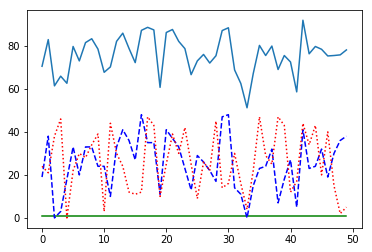

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

m = 50
X = np.ones((m,3), dtype=np.float32)
X[:, 1] = np.random.randint(0, 50, (m))
X[:, 2] = np.random.randint(0, 50, (m))
y = X.T[0] * 50 + X.T[1] * 0.7 + X.T[2] * 0.3
y = y.reshape(50,-1)
print(y.shape)
plt.plot(np.arange(m), X.T[0], 'g-')
plt.plot(np.arange(m), X.T[1], 'b--')
plt.plot(np.arange(m), X.T[2], 'r:')
plt.plot(np.arange(m), y)

In [23]:
W = np.random.rand(3,1)
print('initial W', W.ravel())

learning_rate = 0.0005
epochs = 50000
for epoch in range(epochs):
    hypothesis = X.dot(W)
    loss = hypothesis - y
    cost = 1/m * np.sum(loss**2)
    gradient = 2/m * X.T.dot(loss)
    W = W - learning_rate * gradient
    if epoch %5000 == 0:
        print('epoch:',epoch,' cost:',cost)
print('Final W:',W.ravel(), 'cost:%f'%cost, 'gradient:', gradient.ravel())



initial W [0.9021421  0.9076193  0.19962604]
epoch: 0  cost: 2164.451233809669
epoch: 5000  cost: 88.43207360807692
epoch: 10000  cost: 34.73222720340547
epoch: 15000  cost: 13.64129051022338
epoch: 20000  cost: 5.357698649574701
epoch: 25000  cost: 2.104268272725323
epoch: 30000  cost: 0.8264639826215714
epoch: 35000  cost: 0.32459868517248786
epoch: 40000  cost: 0.12748808010216614
epoch: 45000  cost: 0.05007170796279086
Final W: [49.54140821  0.70883046  0.30728873] cost:0.019670 gradient: [-0.08572113  0.00165062  0.00136242]


## sciki-learn 구현

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
W = lr.coef_
b = lr.intercept_
print('W:', W, 'b:', b)


W: [[0.  0.7 0.3]] b: [50.]
